<a href="https://colab.research.google.com/github/aarmintia/Electronic-Product-Rating/blob/main/Electronic_Product_Data_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
products0 = pd.read_excel('/content/Onyx Data -DataDNA Dataset Challenge - Electronics Product Data Ratings - February 2024.xlsx', sheet_name = 'Dataset')
products = products0.copy()

In [ ]:
products.shape

(7299, 24)

In [ ]:
null_perc = round((products.isnull().sum() / len(products)) * 100, 1)
null_perc

id                      0.0
brand                   0.0
categories              0.0
colors                 27.7
dateAdded               0.0
dateUpdated             0.0
dimension              16.6
imageURLs               0.0
keys                    0.0
manufacturer           36.5
manufacturerNumber      0.0
name                    0.0
reviews.date            0.8
reviews.dateSeen        0.0
reviews.doRecommend    19.1
reviews.numHelpful     20.4
reviews.rating          2.2
reviews.sourceURLs      0.0
reviews.text            0.1
reviews.title           0.1
reviews.username        0.0
sourceURLs              0.0
upc                     0.0
weight                  0.0
dtype: float64

To determine missing values of reviews.doRecommend column, determine the possibility of TRUE/FALSE using the reviews.title column. Copy reviews.text column if reviews.title is null

In [ ]:
products[products['reviews.title'].isnull()]

,id,brand,categories,colors,dateAdded,dateUpdated,dimension,imageURLs,keys,manufacturer,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
5426,AVpfVI9wilAPnD_xZxH-,WD,"Computers,Internal Hard Drives,Internal Drives...",NaN,2015-08-16T21:01:50Z,2018-06-05T12:48:22Z,4.0 in x 5.8 in x 1.0 in,https://i5.walmartimages.com/asr/92471d38-b293...,2tbred5400rpmsataiii35internalnashdd/b008jjlz7...,NaN,...,NaN,NaN,4.0,http://reviews.cdw.com/0058-en_us/2764463/revi...,I'm not sure what all i can say about a hard d...,NaN,FiyaFly,http://www.amazon.com/Red-2TB-Hard-Disk-Drive/...,7.180000e+11,1.32 lb
5439,AVpfVI9wilAPnD_xZxH-,WD,"Computers,Internal Hard Drives,Internal Drives...",NaN,2015-08-16T21:01:50Z,2018-06-05T12:48:22Z,4.0 in x 5.8 in x 1.0 in,https://i5.walmartimages.com/asr/92471d38-b293...,2tbred5400rpmsataiii35internalnashdd/b008jjlz7...,NaN,...,NaN,NaN,5.0,http://reviews.cdw.com/0058-en_us/2764463/revi...,I have some of these drives in my HP microserv...,NaN,Rob Annable,http://www.amazon.com/Red-2TB-Hard-Disk-Drive/...,7.180000e+11,1.32 lb
5450,AVpfVI9wilAPnD_xZxH-,WD,"Computers,Internal Hard Drives,Internal Drives...",NaN,2015-08-16T21:01:50Z,2018-06-05T12:48:22Z,4.0 in x 5.8 in x 1.0 in,https://i5.walmartimages.com/asr/92471d38-b293...,2tbred5400rpmsataiii35internalnashdd/b008jjlz7...,NaN,...,NaN,NaN,5.0,http://reviews.cdw.com/0058-en_us/2764463/revi...,"I love the WD Red line. I have used all sizes,...",NaN,ABoushard,http://www.amazon.com/Red-2TB-Hard-Disk-Drive/...,7.180000e+11,1.32 lb
5453,AVpfVI9wilAPnD_xZxH-,WD,"Computers,Internal Hard Drives,Internal Drives...",NaN,2015-08-16T21:01:50Z,2018-06-05T12:48:22Z,4.0 in x 5.8 in x 1.0 in,https://i5.walmartimages.com/asr/92471d38-b293...,2tbred5400rpmsataiii35internalnashdd/b008jjlz7...,NaN,...,NaN,NaN,5.0,http://reviews.cdw.com/0058-en_us/2764463/revi...,Have two of these for my MicroServer - no issu...,NaN,Nitroz,http://www.amazon.com/Red-2TB-Hard-Disk-Drive/...,7.180000e+11,1.32 lb


In [ ]:
products['reviews.title'] = products['reviews.title'].fillna(products['reviews.text'])

In [ ]:
products['reviews.title'].isnull().sum()

0

In [ ]:
products['Recommended'] = products['reviews.title'].apply(lambda x:sia.polarity_scores(x)['compound'] >= 0)
products.head(5)

,id,brand,categories,colors,dateAdded,dateUpdated,dimension,imageURLs,keys,manufacturer,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight,Recommended
0,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,...,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,True
1,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,...,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,True
2,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,...,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,True
3,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,...,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,True
4,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,...,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,True


In [ ]:
comparison = products['reviews.doRecommend'].isnull()
print(products.loc[comparison,['Recommended', 'reviews.title']])

      Recommended                                      reviews.title
476          True                                 love this keyboard
487          True                                         Nice Cover
491          True                   Great Keyboard for Surface Pro 4
495          True  Nice keyboard, should be standard with the Sur...
496          True                         Worthy Upgrade for the SP3
...           ...                                                ...
6287         True                              Best Remote Available
6309         True                           logitech Ultimate remote
7292         True                                Nice, modern design
7293        False                                        Poor design
7294         True                                       Great Remote

[1391 rows x 2 columns]


In [ ]:
products['reviews.doRecommend'] = products['reviews.doRecommend'].fillna(products['Recommended'])

In [ ]:
products.isnull().sum()

id                        0
brand                     0
categories                0
colors                 2019
dateAdded                 0
dateUpdated               0
dimension              1209
imageURLs                 0
keys                      0
manufacturer           2667
manufacturerNumber        0
name                      0
reviews.date             61
reviews.dateSeen          0
reviews.doRecommend       0
reviews.numHelpful     1486
reviews.rating          164
reviews.sourceURLs        0
reviews.text              5
reviews.title             0
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
Recommended               0
dtype: int64

For null values in reviews.rating, put 1 if FALSE in reviews.doRecommend and 5 if TRUE

In [ ]:
products['Rating'] = products['reviews.doRecommend'].apply(lambda x:5 if x else 1)
print(products[['reviews.doRecommend','reviews.rating','Rating']])

     reviews.doRecommend  reviews.rating  Rating
0                    1.0             5.0       5
1                    1.0             4.0       5
2                    1.0             4.0       5
3                    1.0             5.0       5
4                    1.0             5.0       5
...                  ...             ...     ...
7294                True             4.0       5
7295                 1.0             4.0       5
7296                 1.0             4.0       5
7297                 1.0             5.0       5
7298                 1.0             4.0       5

[7299 rows x 3 columns]


In [ ]:
compare = products['reviews.rating'] == products['Rating']
print(products.loc[~compare,['reviews.rating','Rating']].head(25))

    reviews.rating  Rating
1              4.0       5
2              4.0       5
6              4.0       5
7              3.0       1
8              4.0       5
11             4.0       1
12             4.0       5
13             4.0       5
14             4.0       5
18             4.0       5
24             4.0       5
27             4.0       5
29             4.0       5
31             4.0       5
39             3.0       5
40             4.0       5
44             4.0       5
45             4.0       5
48             4.0       5
52             3.0       1
54             2.0       1
57             4.0       5
58             4.0       5
59             4.0       5
65             4.0       5


In [ ]:
products['reviews.rating'] = products['reviews.rating'].fillna(products['Rating'])

In [ ]:
products.isnull().sum()

id                        0
brand                     0
categories                0
colors                 2019
dateAdded                 0
dateUpdated               0
dimension              1209
imageURLs                 0
keys                      0
manufacturer           2667
manufacturerNumber        0
name                      0
reviews.date             61
reviews.dateSeen          0
reviews.doRecommend       0
reviews.numHelpful     1486
reviews.rating            0
reviews.sourceURLs        0
reviews.text              5
reviews.title             0
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
Recommended               0
Rating                    0
dtype: int64

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7299 non-null   object 
 1   brand                7299 non-null   object 
 2   categories           7299 non-null   object 
 3   colors               5280 non-null   object 
 4   dateAdded            7299 non-null   object 
 5   dateUpdated          7299 non-null   object 
 6   dimension            6090 non-null   object 
 7   imageURLs            7299 non-null   object 
 8   keys                 7299 non-null   object 
 9   manufacturer         4632 non-null   object 
 10  manufacturerNumber   7299 non-null   object 
 11  name                 7299 non-null   object 
 12  reviews.date         7238 non-null   object 
 13  reviews.dateSeen     7299 non-null   object 
 14  reviews.doRecommend  7299 non-null   object 
 15  reviews.numHelpful   5813 non-null   f

In [ ]:
rating_recommendation_relation = products.groupby('reviews.rating')['reviews.doRecommend'].value_counts().unstack()

print(rating_recommendation_relation)


reviews.doRecommend  0.0   1.0
reviews.rating                
1.0                  247    81
2.0                  159    63
3.0                  210   230
4.0                   45  1618
5.0                   20  4626


In [ ]:
rating_recommendation_relation = products.groupby('reviews.rating')['reviews.doRecommend'].value_counts(normalize=True).unstack()

print(rating_recommendation_relation)

rating_recommendation_relation.to_excel('proportion.xlsx', index=False)

reviews.doRecommend       0.0       1.0
reviews.rating                         
1.0                  0.753049  0.246951
2.0                  0.716216  0.283784
3.0                  0.477273  0.522727
4.0                  0.027060  0.972940
5.0                  0.004305  0.995695


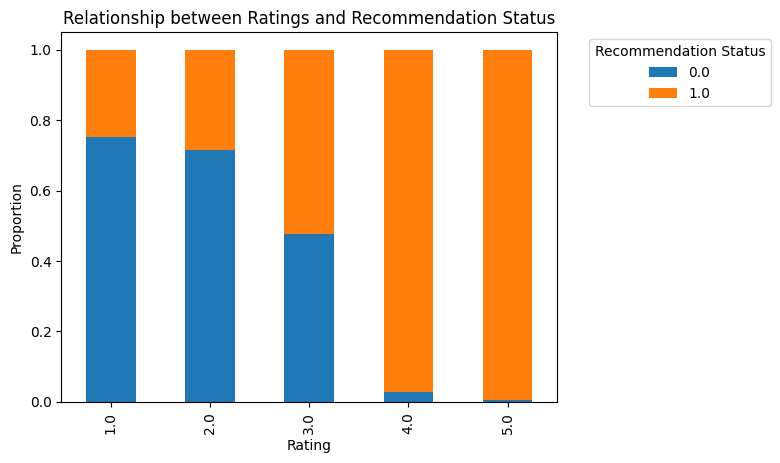

In [ ]:
rating_recommendation_relation = products.groupby('reviews.rating')['reviews.doRecommend'].value_counts(normalize=True).unstack()

# Plot the result
rating_recommendation_relation.plot(kind='bar', stacked=True)
plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.title('Relationship between Ratings and Recommendation Status')
plt.legend(title='Recommendation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


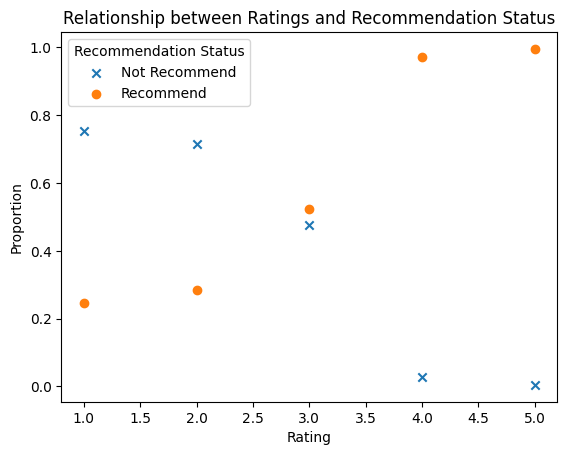

In [ ]:
products['reviews.doRecommend'] = products['reviews.doRecommend'].astype(bool)

rating_recommendation_relation = products.groupby('reviews.rating')['reviews.doRecommend'].value_counts(normalize=True).unstack()

plt.scatter(rating_recommendation_relation.index, rating_recommendation_relation[False], label='Not Recommend', marker='x')
plt.scatter(rating_recommendation_relation.index, rating_recommendation_relation[True], label='Recommend', marker='o')

plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.title('Relationship between Ratings and Recommendation Status')
plt.legend(title='Recommendation Status')
plt.show()


# 2. Brands with the highest average customer satisfaction across different product categories:

In [ ]:
average_satisfaction = products.groupby('brand')['reviews.rating'].mean().reset_index()

ranked_brands = average_satisfaction.sort_values(by='reviews.rating', ascending=False)

print(ranked_brands)


                     brand  reviews.rating
26                     SVS        5.000000
14                  Kicker        5.000000
5          CLARITY-TELECOM        4.909091
7    Definitive Technology        4.804878
6                  Corsair        4.798246
36                      WD        4.796296
3         Bowers & Wilkins        4.766355
25          Power Acoustik        4.750000
37                  Yamaha        4.666667
20                 Midland        4.659091
17                 Lowepro        4.657343
33                 Toshiba        4.652174
13                     JVC        4.626761
19               Microsoft        4.615385
22                 Netgear        4.570470
15                  Lenovo        4.564103
24                     Pny        4.549738
0                   Alpine        4.544444
32                    Sony        4.520535
2                     Bose        4.520000
4                  Boytone        4.506024
8                     Dell        4.500000
11         

In [ ]:
products['categories'].nunique()

49

In [ ]:
products['determined_category'] = products['name'].map({
"2TB Red 5400 rpm SATA III 3.5 Internal NAS HDD": "Storage Device",
"Acoustimass 6 Series V Home Theater Speaker System (Black)": "Home Theater System",
"Air-Fi Runaway AF32 Stereo Bluetooth Wireless Headphones with Hidden Microphone (White)": "Wireless Headphones",
'Alpine - 6-1/2" 2-Way Coaxial Car Speakers with Polypropylene Cones (Pair) - Black': "Car Audio Equipment",
"AW6500 All-Weather Outdoor Speaker (White, Single)": "Outdoor Speaker",
"Bowers & Wilkins P7 Wired Over Ear Headphones": "Over-Ear Headphones",
"Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond": "Home Theater System",
"Clarity - Super-Loud Phone Ringer - White": "Phone Accessories",
"Corsair CMSA8GX3M2A1066C7 Apple 8 GB Dual Channel Kit DDR3 1066 (PC3 8500) 204-Pin DDR3 Laptop SO-DIMM Memory 1.5V": "Memory (RAM)",
"CRX-322 CD Receiver": "Audio System",
"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black": "Audio System",
"Everest Elite 700 Around-Ear Wireless Headphones (White)": "Over-Ear Headphones",
"Flipside 300 Backpack (Black)": "Backpack",
"House of Marley EM-DH003-PS TTR Noise-Cancelling Over-Ear Headphones (Black)": "Over-Ear Headphones",
"iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC)": "Phone Accessories",
'JBL - 6" x 8" 2-Way Coaxial Car Speakers with Polypropylene Cones (Pair) - Black': "Car Audio Equipment",
"JVC KD-X320BTS Apple iPod and Android Digital Media Receiver with Bluetooth": "Car Audio Equipment",
"Kicker 41IK5BT2V2 Amphitheater High-Performance Audio System with Bluetooth, Black": "Audio System",
"Lenovo - AC Adapter for Select Lenovo Yoga Laptops - Black": "Tablet Accessories",
"Logitech 915-000224 Harmony Ultimate One 15-Device Universal Infrared Remote with Customizable Touch Screen Control - Black": "Audio System",
"Logitech G403 Wireless Gaming Mouse with High Performance Gaming Sensor": "Gaming Mouse",
"Microsoft Surface Pro 4 Type Cover with Fingerprint ID": "Tablet Accessories",
"Midland Weather Alert Radio, 1.0 CT": "Emergency Radio",
"Motorola Wi-Fi Pet Video Camera": "Pet Camera",
"Nighthawk AC1900 Dual-Band Wi-Fi USB Adapter": "Wi-Fi Adapter",
"NS-IW480CWH In-Ceiling 8 Natural Sound Three-Way Speaker System (Pair)": "In-Ceiling Speakers",
"NS-SP1800BL 5.1-Channel Home Theater System (Black)": "Home Theater System",
"PNY Anarchy 16GB Kit (2x8GB) DDR4 2400MHz (PC4-19200) CL15 Desktop Memory (BLUE) - MD16GK2D4240015AB": "Memory (RAM)",
'Power Acoustik - Gothic Series 10" Dual-Voice-Coil 2-Ohm Subwoofer - Black': "Audio System",
"Prime Three-Way Center Channel Speaker (Premium Black Ash)": "Audio System",
"Round LCD/Projector Ceiling Plate - Black": "TV Wall Mount",
"SAMSUNG 40'' Class FHD (1080P) Smart LED TV (UN40M5300)": "TV",
"Samsung Universal 3100mAh Portable External Battery Charger - White": "Portable Battery Charger",
"Sanus VLF410B1 10-Inch Super Slim Full-Motion Mount for 37 - 84 Inches TV's": "TV Wall Mount",
"SiriusXM SXEZR1V1 XM Onyx EZR Satellite Radio Receiver with Vehicle Kit": "Satellite Radio Receiver",
"Slingbox M2": "TV Streaming Device",
"Sony LBT-GPX555 Mini-System with Bluetooth and NFC": "Audio System",
"Sony MEXM100BT 160W RMS Marine CD Receiver with Bluetooth (Black) and SiriusXM Ready": "Marine Audio Receiver",
"Sony Mini Digital Video Cassettes - DVC - 1 Hour": "Mini DV Tapes",
"Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black": "Wireless Speaker",
"Sony SRSXB30/BLK XB30 Portable Wireless Speaker with Bluetooth": "Wireless Speaker",
"SRS-ZR7 Wireless Speaker": "Wireless Speaker",
"The Rebel BT On-Ear Wireless Bluetooth Headphones (Black)": "Over-Ear Headphones",
"Verizon MiFi 6620L Jetpack 4G LTE Mobile Hotspot (Verizon Wireless)": "Mobile Hotspot",
"XPS 8920 Tower Desktop Computer": "Computer",
"Alpine": "Car Audio Equipment",
"Logitech 915-000224  Harmony Ultimate One 15-Device Universal Infrared Remote with Customizable Touch Screen Control - Black": "Audio System",
"Toshiba - 3TB Internal Serial ATA III Hard Drive for Desktops": "Storage Device",
"Toshiba Micro Component Speaker System: Wireless Bluetooth Speaker Sound System with FM": "Home Audio",
"Travel RockStar 3-in-1 2A USB and Dual-Outlet Wall Charger with Internal 3000mAh Battery Pack": "Portable Battery Charger",
"Ultimate Ears MEGABLAST Portable Wi-Fi/Bluetooth Speaker with hands-free Amazon Alexa voice control (waterproof) - Graphite Black": "Wireless Speaker"

})


In [ ]:
products['determined_category'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7294    False
7295    False
7296    False
7297    False
7298    False
Name: determined_category, Length: 7299, dtype: bool

In [ ]:
products['determined_category'].nunique()

27

In [ ]:
average_satisfaction = products.groupby(['determined_category', 'brand'])['reviews.rating'].mean().reset_index()

ranked_brands_by_category = average_satisfaction.sort_values(by=['reviews.rating'], ascending=[False])

print(ranked_brands_by_category)


         determined_category                   brand  reviews.rating
4               Audio System                     SVS        5.000000
1               Audio System                  Kicker        5.000000
15                Home Audio                 Toshiba        5.000000
30         Phone Accessories         CLARITY-TELECOM        4.909091
14              Gaming Mouse                Logitech        4.852273
19       In-Ceiling Speakers                  Yamaha        4.842105
23             Mini DV Tapes                    Sony        4.830000
25           Outdoor Speaker   Definitive Technology        4.804878
21              Memory (RAM)                 Corsair        4.798246
36            Storage Device                      WD        4.796296
26       Over-Ear Headphones        Bowers & Wilkins        4.766355
10       Car Audio Equipment                     JBL        4.762887
3               Audio System          Power Acoustik        4.750000
18       Home Theater System      

# 3. Influence of product features on reviews and ratings:

<ipython-input-28-7e0308e79139>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


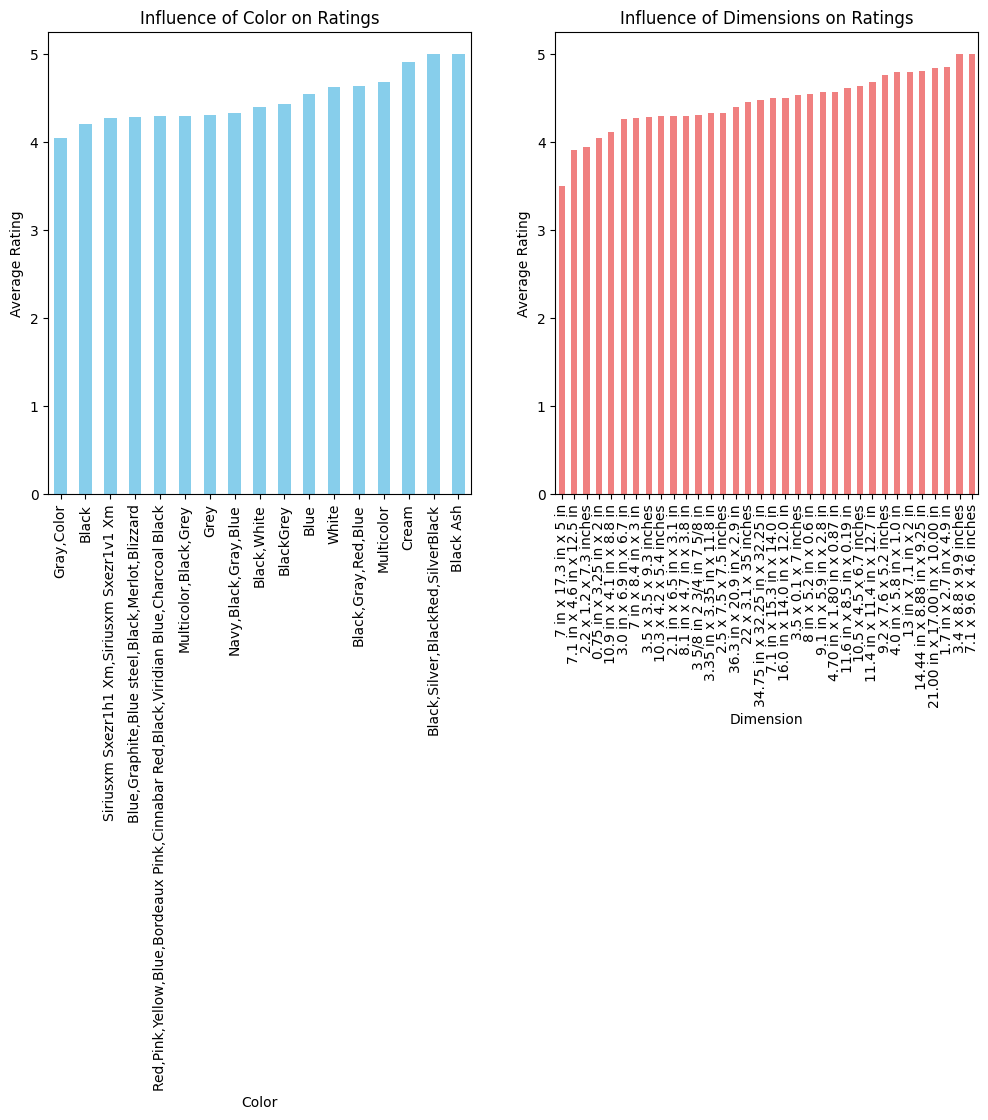

In [ ]:
color_influence = products.groupby('colors')['reviews.rating'].mean()

dimension_influence = products.groupby('dimension')['reviews.rating'].mean()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
color_influence.sort_values().plot(kind='bar', color='skyblue')
plt.title('Influence of Color on Ratings')
plt.xlabel('Color')
plt.ylabel('Average Rating')

plt.subplot(1, 2, 2)
dimension_influence.sort_values().plot(kind='bar', color='lightcoral')
plt.title('Influence of Dimensions on Ratings')
plt.xlabel('Dimension')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()


In [ ]:
products['colors'] = products['colors'].fillna('Not Specified')
products['dimension'] = products['dimension'].fillna('Not Specified')

In [ ]:
products.isnull().sum()

id                        0
brand                     0
categories                0
colors                    0
dateAdded                 0
dateUpdated               0
dimension                 0
imageURLs                 0
keys                      0
manufacturer           2667
manufacturerNumber        0
name                      0
reviews.date             61
reviews.dateSeen          0
reviews.doRecommend       0
reviews.numHelpful     1486
reviews.rating            0
reviews.sourceURLs        0
reviews.text              5
reviews.title             0
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
Recommended               0
Rating                    0
determined_category       0
dtype: int64

In [ ]:
products['colors'].unique()

array(['Black', 'Multicolor', 'Not Specified',
       'Blue,Graphite,Blue steel,Black,Merlot,Blizzard',
       'Multicolor,Black,Grey',
       'Siriusxm Sxezr1h1 Xm,Siriusxm Sxezr1v1 Xm', 'Blue',
       'Red,Pink,Yellow,Blue,Bordeaux Pink,Cinnabar Red,Black,Viridian Blue,Charcoal Black',
       'Navy,Black,Gray,Blue', 'Grey', 'BlackGrey', 'Black,Gray,Red,Blue',
       'White', 'Gray,Color', 'Black,White', 'Cream',
       'Black,Silver,BlackRed,SilverBlack', 'Black Ash'], dtype=object)

In [ ]:
products['dimension'].unique()

array(['11.6 in x 8.5 in x 0.19 in', '16.0 in x 14.0 in x 12.0 in',
       '22 x 3.1 x 35 inches', '3.5 x 3.5 x 9.3 inches', 'Not Specified',
       '13 in x 7.1 in x 2 in', '2.1 in x 6.5 in x 3.1 in',
       '9.1 in x 5.9 in x 2.8 in', '7 in x 8.4 in x 3 in',
       '8 in x 5.2 in x 0.6 in', '8.1 in x 4.7 in x 3.8 in',
       '10.3 x 4.2 x 5.4 inches', '3.35 in x 3.35 in x 11.8 in',
       '2.5 x 7.5 x 7.5 inches', '7.1 in x 4.6 in x 12.5 in',
       '7 in x 17.3 in x 5 in', '3 5/8 in 2 3/4 in 7 5/8 in',
       '7.1 in x 15.3 in x 14.0 in', '36.3 in x 20.9 in x 2.9 in',
       '11.4 in x 11.4 in x 12.7 in', '1.7 in x 2.7 in x 4.9 in',
       '10.9 in x 4.1 in x 8.8 in', '10.5 x 4.5 x 6.7 inches',
       '34.75 in x 32.25 in x 32.25 in', '21.00 in x 17.00 in x 10.00 in',
       '0.75 in x 3.25 in x 2 in', '14.44 in x 8.88 in x 9.25 in',
       '9.2 x 7.6 x 5.2 inches', '3.0 in x 6.9 in x 6.7 in',
       '3.4 x 8.8 x 9.9 inches', '7.1 x 9.6 x 4.6 inches',
       '4.0 in x 5.8 in x 1.0 i

In [ ]:
products['dimension'].nunique()

35

In [ ]:
products['cleaned_dimension'] = products['dimension'].apply(lambda x: re.sub(r'\binches?\b', '', str(x))
                                                             .replace(' x ', 'x')
                                                             .replace(' inches', '')
                                                             .replace(' in', '')
                                                             .strip())

products['cleaned_dimension'] = products['cleaned_dimension'].apply(lambda x: re.sub(r'(?<=\d)\.0\b', '', x))

products[['length', 'width', 'height']] = products['cleaned_dimension'].str.split('x', expand=True)

products[['length', 'width', 'height']] = products[['length', 'width', 'height']].apply(pd.to_numeric, errors='coerce')

# Calculate the area (assuming it's 2D area, length x width)
products['area'] = products['length'] * products['width']

# Round area to 1 decimal place
products['area'] = products['area'].round(1)

# Replace null values in 'area' with 'Not Specified'
products['area'].fillna('Not Specified', inplace=True)

# Display the DataFrame with the calculated area
print(products[['dimension', 'area']])


                       dimension           area
0     11.6 in x 8.5 in x 0.19 in           98.6
1     11.6 in x 8.5 in x 0.19 in           98.6
2     11.6 in x 8.5 in x 0.19 in           98.6
3     11.6 in x 8.5 in x 0.19 in           98.6
4     11.6 in x 8.5 in x 0.19 in           98.6
...                          ...            ...
7294      2.2 x 1.2 x 7.3 inches            2.6
7295               Not Specified  Not Specified
7296               Not Specified  Not Specified
7297               Not Specified  Not Specified
7298               Not Specified  Not Specified

[7299 rows x 2 columns]


In [ ]:
products['cleaned_dimension'].nunique()

35

In [ ]:
products['area'].nunique()

33

<ipython-input-37-8c2aed354a52>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


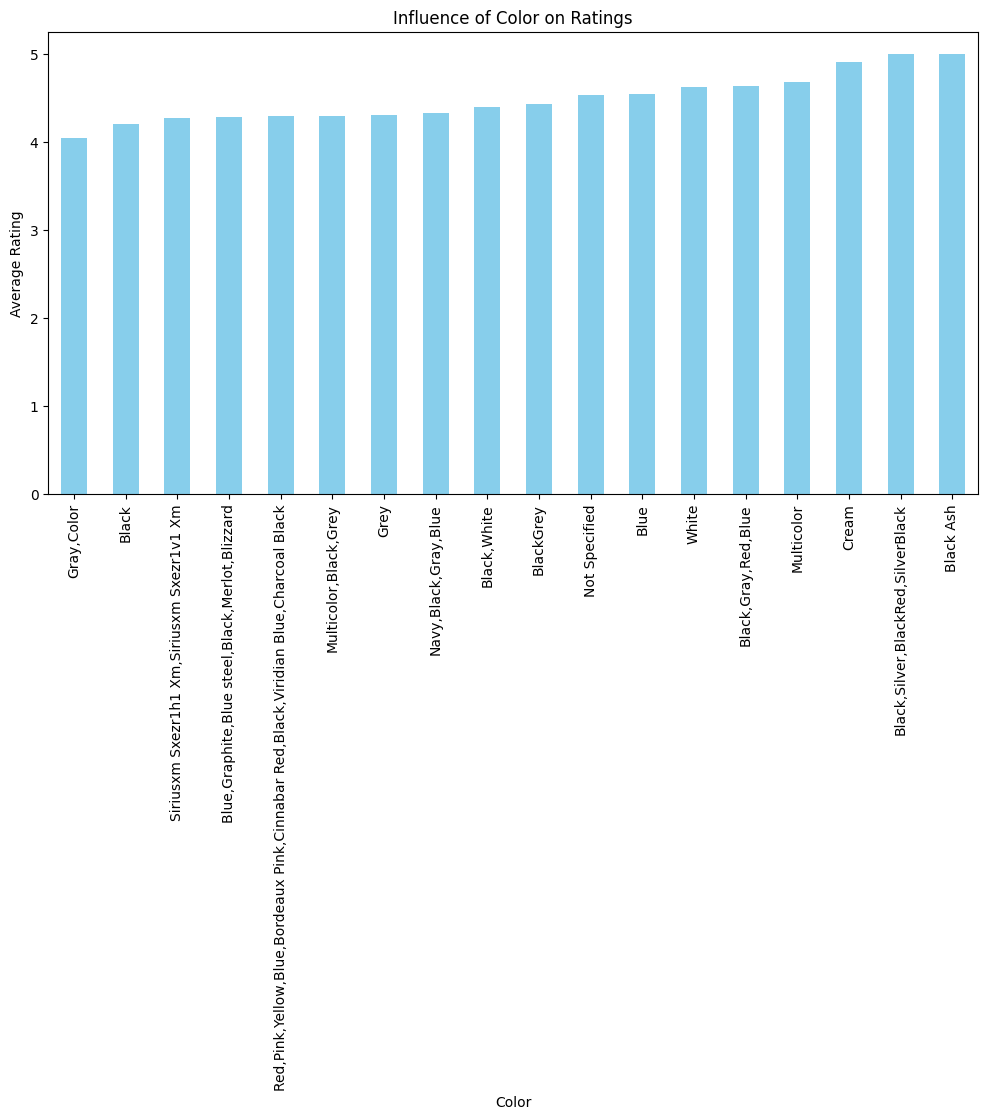

In [ ]:
color_influence = products.groupby('colors')['reviews.rating'].mean()

plt.figure(figsize=(12, 6))

color_influence.sort_values().plot(kind='bar', color='skyblue')
plt.title('Influence of Color on Ratings')
plt.xlabel('Color')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()


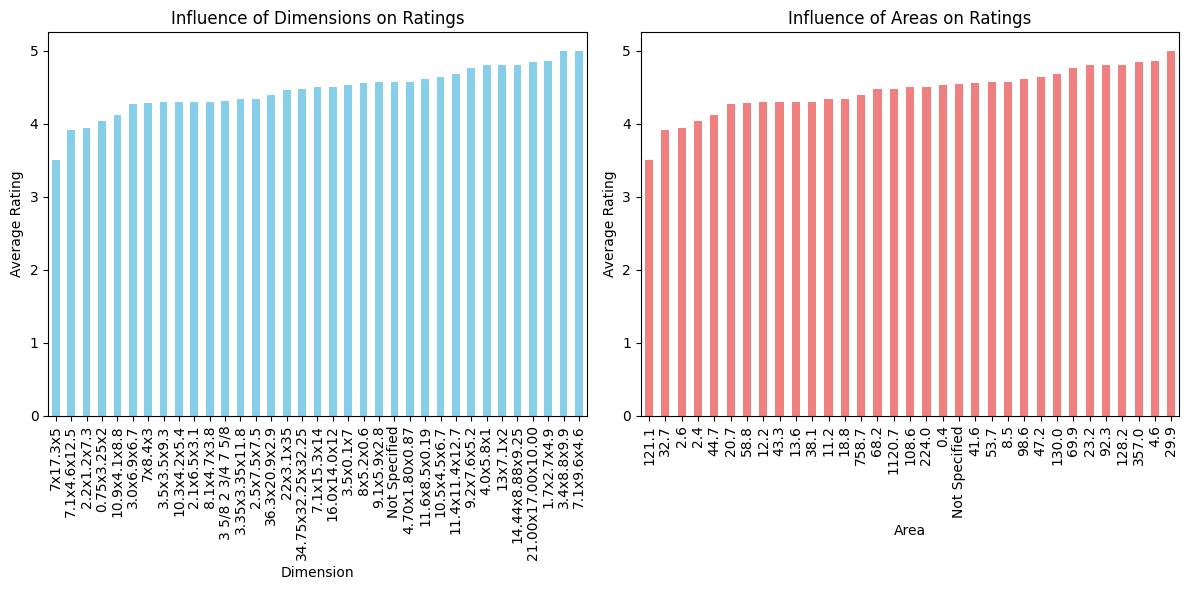

In [ ]:
cleaned_dimension_influence = products.groupby('cleaned_dimension')['reviews.rating'].mean()

area_influence = products.groupby('area')['reviews.rating'].mean()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
cleaned_dimension_influence.sort_values().plot(kind='bar', color='skyblue')
plt.title('Influence of Dimensions on Ratings')
plt.xlabel('Dimension')
plt.ylabel('Average Rating')

plt.subplot(1, 2, 2)
area_influence.sort_values().plot(kind='bar', color='lightcoral')
plt.title('Influence of Areas on Ratings')
plt.xlabel('Area')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if isinstance(text, str):  # Check if it's a string
        words = word_tokenize(text)
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)
    else:
        return text

products['Text_No_Stopwords'] = products['reviews.text'].apply(remove_stopwords)

print(products[['reviews.text', 'Text_No_Stopwords']])


                                           reviews.text  \
0     This keyboard is very easy to type on, but the...   
1     It's thin and light. I can type pretty easily ...   
2     I love the new design the keys are spaced well...   
3     Attached easily and firmly. Has a nice feel. A...   
4     Our original keyboard was okay, but did not ha...   
...                                                 ...   
7294  This remote was a decent replacement for my lo...   
7295  This looks good on my celling. Flushes very we...   
7296  Great Plate for projector mount, very easy to ...   
7297  This mount worked very well for me when I used...   
7298  It's a nice solid mounting plate check and mak...   

                                      Text_No_Stopwords  
0     keyboard easy type , fingerprint reader best f...  
1                  's thin light . type pretty easily .  
2     love new design keys spaced well mis types . f...  
3     Attached easily firmly . nice feel . must Surf...  
4

In [ ]:
products.to_excel('products_final.xlsx', index=False)

In [ ]:
duplicates_exist = products.duplicated().any()

if duplicates_exist:
    print("Duplicates Exist")
else:
    print("No Duplicates")


No Duplicates


In [ ]:
products0['brand'].nunique()

38